In [1]:
import time
t0 = time.time()

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as img

print('import time =', time.time()-t0)

my_image = img.imread('orea.jpg', format='jpg')
height, length, color = my_image.shape

my_image = np.array(my_image)

j_start = int(length/2 - height/2)

print('image time =', time.time() - t0)

n = 28

def new_image(my_image):
    # Convert 720 * 1080 rvb image into 28 * 28 black&white
    

    grey_image = np.zeros((height, height), dtype='int32')
    
    for i in range(height):
        for j in range(height):
            sum = 0
            for k in range(3):
                sum += my_image[i][j+j_start][k]
            grey_image[i][j] = 255 - sum//3
            # grey_image[i][j] = 255 - np.mean(pixel)
            
    print('time 2 =', time.time() - t0)
    
    my_new_image = np.zeros((n, n))
    kl_lim = height // (n - 1) - 1
    k_tot = 0
    count = 0
    
    print('middle time =', time.time() - t0)
    
    for i in range(n):
        l_tot = 0
        for j in range(n):
            count += 1
            sum = 0
            k = 0
            l = 0
            
            while k <= kl_lim and k_tot <= height-1:
                while l <= kl_lim and l_tot <= height-1:
                    sum += grey_image[k_tot][l_tot]
                    l += 1
                k += 1
                
            new_pixel = sum / (k + l)
            my_new_image[i][j] = new_pixel
            l_tot += kl_lim
        k_tot += kl_lim
        
    return my_new_image

im28 = new_image(my_image)

plt.imshow(im28, cmap='Greys')




import time = 0.5070919990539551
image time = 0.5606851577758789


IndexError: index 768 is out of bounds for axis 0 with size 768

In [74]:
import time
t0 = time.time()

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as img

my_image = img.imread('orea.jpg', format='jpg')
height, length, color = my_image.shape


In [77]:

my_image = img.imread('orea.jpg', format='jpg')
height, length, color = my_image.shape

def new_img(image):
    new_image = np.zeros((32,32,3))
    
    for i in range(32):
        for j in range(32):
            pos_i = i * 24
            pos_j = j * 24
            fat_pixel = image[pos_i:pos_i+24, pos_j:pos_j+24]
            new_image[i,j] = np.sum(fat_pixel, axis=(0,1))
    return new_image/new_image.max()


a = new_img(my_image)


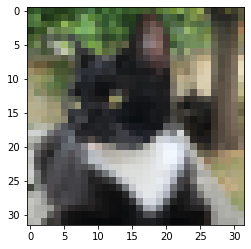

In [78]:
plt.imshow(a)

In [13]:
height//32

32

In [14]:
length//32

24

In [40]:
np.sum(my_image, axis=(0,1))

array([83151727, 84197588, 76033023], dtype=uint64)

In [98]:

def blur():
    new = np.zeros((height, length, color))
    v = 10
    for i in range(height):
        if i<v or i>height-v:
            new[i] = my_image[i]
        else:
            for j in range(length):
                if j<v or j>length-v:
                    new[i][j] = my_image[i][j]
                else:
                    new[i][j] = np.mean(my_image[i-v:i+v, j-v:j+v], axis=(0,1))
    return new/new.max()

a = blur()


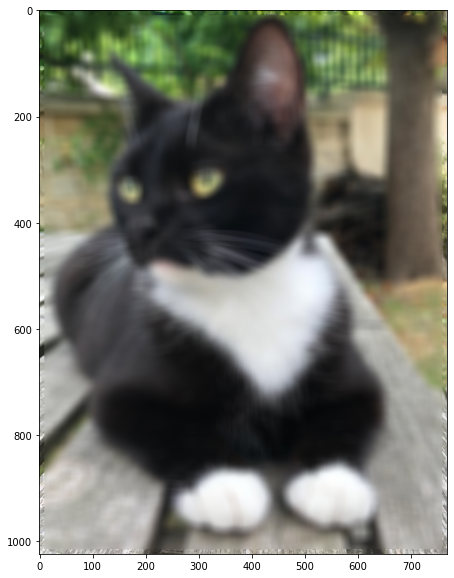

In [99]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(a)

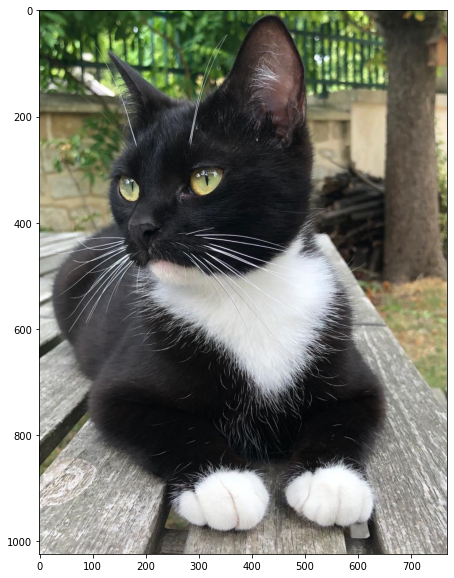

In [100]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(my_image)

In [184]:
x = np.array([
    [0,0,-0.5,0,0],
    [0,-1,-1,-1,0],
    [-0.5,-1,23,-1,-0.5],
    [0,-1,-1,-1,0],
    [0,0,-0.5,0,0],
])

filt = np.stack((x,x,x), axis=2)


def filter(my_image):
    my_im = my_image/my_image.max() - 0.5
    new = np.zeros((height, length, color), dtype=np.float32)
    v = 2
    for i in range(height):
        if i<v or i>height-v-1:
            new[i] = my_im[i]
        else:
            for j in range(length):
                if j<v or j>length-v-1:
                    new[i, j] = my_im[i, j]
                else:
                    new[i, j] = np.sum(my_im[i-v:i+v+1, j-v:j+v+1] * filt, axis=(0,1))
    return (new - new.min()) / new.max()

a = filter(my_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0 1.9067206


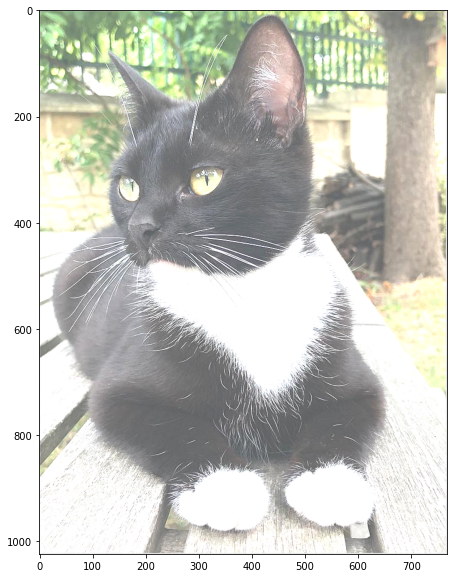

In [185]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(a)
print(a.min(), a.max())

In [152]:
a.max()

1.0

In [140]:
v=1
i,j = 3,3
my_image[i-v:i+v+1, j-v:j+v+1] * filt

array([[[  0,   0,   0],
        [-48, -81, -38],
        [  0,   0,   0]],

       [[-51, -87, -41],
        [260, 425, 200],
        [-50, -83, -40]],

       [[  0,   0,   0],
        [-55, -91, -45],
        [  0,   0,   0]]])